This notebook plots the validation accuracy for each of the 36 models generated by the random forests analysis.

In [1]:
setwd("..")

In [10]:
# adjust plot size rendered inline
options(repr.plot.width = 4, repr.plot.height = 2.4, repr.plot.res = 300)

In [3]:
library(readr)
library(dplyr)
library(purrr)
library(stringr)
library(ggplot2)

In [6]:
validation_accuracy <- Sys.glob("outputs/optimal_rf_seed/*validation_acc*.csv") %>%
  set_names %>%
  map_dfr(read_csv, show_col_types = F, .id = "seed") %>%
  mutate(seed = str_remove(seed,  ".*_")) %>%
  mutate(seed = gsub(".csv", "", seed)) %>% 
  mutate(seed = gsub("seed", "", seed)) 

In [7]:
validation_accuracy$study <- factor(validation_accuracy$study, 
                                    levels = c('PRJNA385949',  'PRJNA237362', 'iHMP', 
                                               'PRJEB2054', 'PRJNA400072', 'SRP057027'))

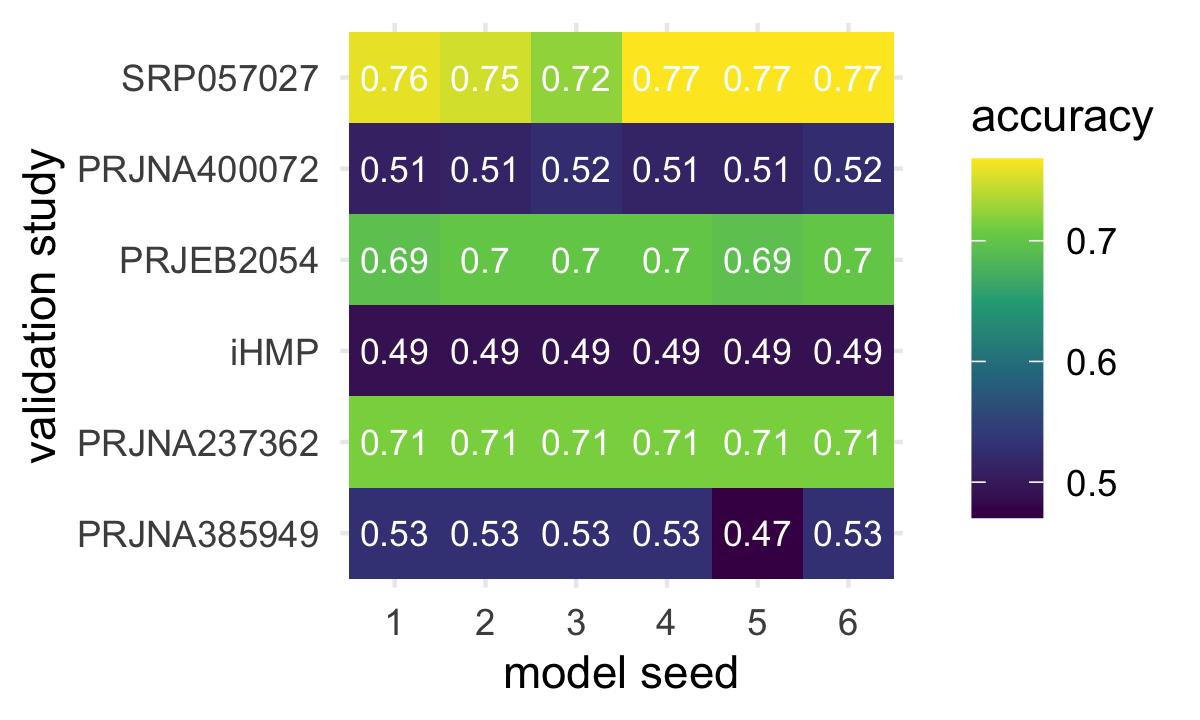

In [11]:
#pdf("figures/loso_validation_accuracy_heatmap_small.pdf", height = 2.4, width = 4)
ggplot(validation_accuracy, aes(x = seed, y = study, fill = accuracy)) +
  geom_tile() +
  geom_text(aes(label=round(accuracy, digits = 2)), color = "white", size = 3) +
  theme_minimal() +
  labs(y = "validation study", x = "model seed") +
  scale_fill_viridis_c()
#dev.off()